In [1]:
import sys
sys.path.append(rf"/Users/baia/Desktop/PYTHON/mba_dsa_usp_esalq")

from TCC.utils.constantes import *
import matplotlib.pyplot as plt

## Transaction Volume ETH and USDC

- Transaction volume: mensura o volume total movimentado em ETH e USDC na semana.

start_date: '2015-08-06'

In [2]:
df_eth_onchain_metrics = pd.read_csv(rf"raw/2016_transactionVolume_ratioProfitLoss_holders_gasUsed_ethSpent.csv")
df_eth_onchain_metrics['Data_UTC'] = pd.to_datetime(df_eth_onchain_metrics['Date'], utc=True,).dt.strftime("%Y-%m-%d")
df_eth_onchain_metrics = df_eth_onchain_metrics.query("Data_UTC > '2015-08-06'")


df_base = df_eth_onchain_metrics.copy()
df_base = df_base.rename(columns={'Transaction Volume (ETH)':'transaction_volume_eth',
                                  'Transaction Volume USD (ETH)':'transaction_volume_usdc'
                                  })

df_base

,Date,transaction_volume_eth,transaction_volume_usdc,The Ratio of Daily On-Chain Transaction Volume in Profit to Loss (ETH),Total Amount Of Holders (ETH),Gas Used (ETH),Eth Spent Over Time (ETH),Data_UTC
344,2015-08-13T00:00:00.000Z,2.055004e+07,3.200790e+07,1.653202,1.321671e+04,5.038660e+08,4.150493e+06,2015-08-13
345,2015-08-20T00:00:00.000Z,3.717748e+06,4.964834e+06,1.161868,1.490529e+04,6.896795e+08,0.000000e+00,2015-08-20
346,2015-08-27T00:00:00.000Z,4.568682e+06,5.945409e+06,2.339618,1.606271e+04,8.701374e+08,9.000000e+05,2015-08-27
347,2015-09-03T00:00:00.000Z,3.001589e+06,3.787524e+06,0.799115,1.687671e+04,1.099880e+09,0.000000e+00,2015-09-03
348,2015-09-10T00:00:00.000Z,3.592569e+06,3.516760e+06,0.671084,1.770557e+04,1.131809e+09,6.000000e+05,2015-09-10
...,...,...,...,...,...,...,...,...
874,2025-10-09T00:00:00.000Z,2.837233e+07,1.159835e+11,0.917082,1.606726e+08,1.138235e+12,0.000000e+00,2025-10-09
875,2025-10-16T00:00:00.000Z,1.948265e+07,7.621770e+10,1.122699,1.614220e+08,1.137668e+12,1.600000e+05,2025-10-16
876,2025-10-23T00:00:00.000Z,1.977869e+07,7.919351e+10,2.167487,1.621754e+08,1.138940e+12,0.000000e+00,2025-10-23
877,2025-10-30T00:00:00.000Z,2.460757e+07,8.924180e+10,0.961909,1.629531e+08,1.138317e+12,0.000000e+00,2025-10-30


In [3]:
print("ETH on-chain features")
df_onchain_features = (
    df_base
    # 1. Garante que temos as colunas base necessárias
    # [['Data_UTC', 'transaction_volume_eth', 'transaction_volume_usdc', 'daily_onchain_trans_profit_to_loss_ratio', 'amount_of_holders_eth','gas_used_eth','eth_spent_over_time']]
)

df_base = df_onchain_features.copy()
df_base['Data_UTC'] = pd.to_datetime(df_onchain_features['Data_UTC'], utc=True,)#.dt.strftime("%Y-%m-%d")


# Visualizar as primeiras linhas
df_base#.dtypes

ETH on-chain features


,Date,transaction_volume_eth,transaction_volume_usdc,The Ratio of Daily On-Chain Transaction Volume in Profit to Loss (ETH),Total Amount Of Holders (ETH),Gas Used (ETH),Eth Spent Over Time (ETH),Data_UTC
344,2015-08-13T00:00:00.000Z,2.055004e+07,3.200790e+07,1.653202,1.321671e+04,5.038660e+08,4.150493e+06,2015-08-13 00:00:00+00:00
345,2015-08-20T00:00:00.000Z,3.717748e+06,4.964834e+06,1.161868,1.490529e+04,6.896795e+08,0.000000e+00,2015-08-20 00:00:00+00:00
346,2015-08-27T00:00:00.000Z,4.568682e+06,5.945409e+06,2.339618,1.606271e+04,8.701374e+08,9.000000e+05,2015-08-27 00:00:00+00:00
347,2015-09-03T00:00:00.000Z,3.001589e+06,3.787524e+06,0.799115,1.687671e+04,1.099880e+09,0.000000e+00,2015-09-03 00:00:00+00:00
348,2015-09-10T00:00:00.000Z,3.592569e+06,3.516760e+06,0.671084,1.770557e+04,1.131809e+09,6.000000e+05,2015-09-10 00:00:00+00:00
...,...,...,...,...,...,...,...,...
874,2025-10-09T00:00:00.000Z,2.837233e+07,1.159835e+11,0.917082,1.606726e+08,1.138235e+12,0.000000e+00,2025-10-09 00:00:00+00:00
875,2025-10-16T00:00:00.000Z,1.948265e+07,7.621770e+10,1.122699,1.614220e+08,1.137668e+12,1.600000e+05,2025-10-16 00:00:00+00:00
876,2025-10-23T00:00:00.000Z,1.977869e+07,7.919351e+10,2.167487,1.621754e+08,1.138940e+12,0.000000e+00,2025-10-23 00:00:00+00:00
877,2025-10-30T00:00:00.000Z,2.460757e+07,8.924180e+10,0.961909,1.629531e+08,1.138317e+12,0.000000e+00,2025-10-30 00:00:00+00:00


In [4]:
df_eth_processed = (
    df_base
    .sort_values('Data_UTC')
    # .rename(columns={'Transaction Volume Over Time (ETH)': 'ETH_Vol_Raw'})
    
    # 1. Tratamento Logarítmico (Suaviza a escala exponencial)
    # Transforma "1 bilhão" e "100 milhões" em distâncias comparáveis estatisticamente
    .assign(ETH_Vol_Log = lambda df: np.log(df['transaction_volume_eth'] + 1)) # +1 evita erro log(0)
    
    # 2. Variação Diária (O pulso da atividade)
    # Positivo: A atividade na rede Ethereum está acelerando (Risco On)
    # Negativo: A atividade está esfriando (Possível volta pro BTC)
    .assign(ETH_Activity_Diff = lambda df: df['ETH_Vol_Log'].diff())
    
    # Seleção Final
    [['Data_UTC', 'ETH_Activity_Diff']]
)

df_eth_processed

,Data_UTC,ETH_Activity_Diff
344,2015-08-13 00:00:00+00:00,NaN
345,2015-08-20 00:00:00+00:00,-1.709744
346,2015-08-27 00:00:00+00:00,0.206107
347,2015-09-03 00:00:00+00:00,-0.420083
348,2015-09-10 00:00:00+00:00,0.179726
...,...,...
874,2025-10-09 00:00:00+00:00,0.098109
875,2025-10-16 00:00:00+00:00,-0.375890
876,2025-10-23 00:00:00+00:00,0.015081
877,2025-10-30 00:00:00+00:00,0.218449


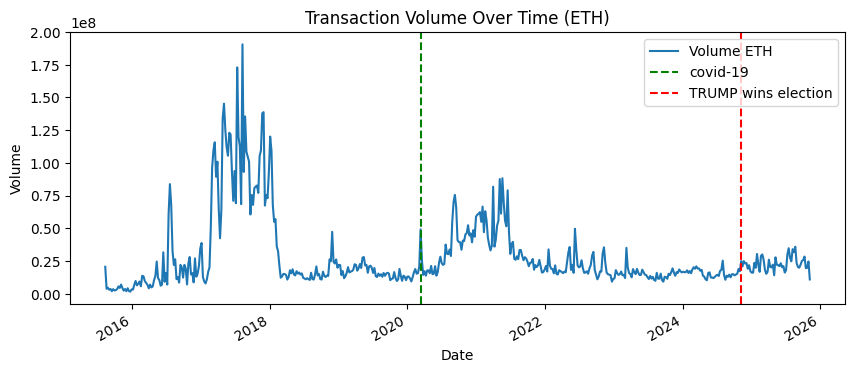

In [5]:
plt.figure(figsize=(10,4))
plt.plot(df_base['Data_UTC'], df_base['transaction_volume_eth'], label='Volume ETH')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('Transaction Volume Over Time (ETH)')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()


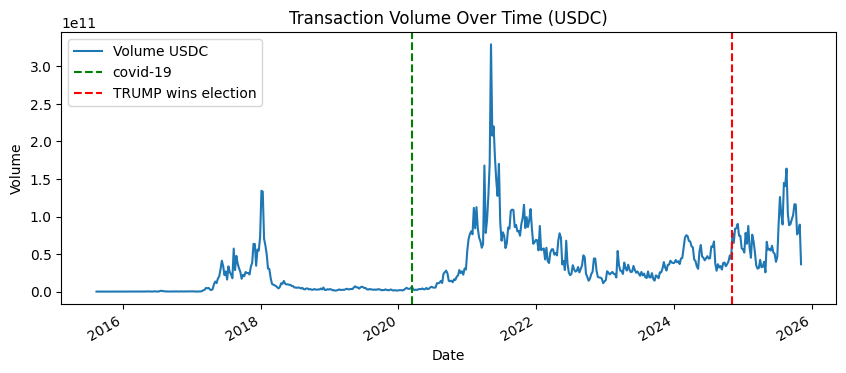

In [6]:
plt.figure(figsize=(10,4))
plt.plot(df_base['Data_UTC'], df_base['transaction_volume_usdc'], label='Volume USDC')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('Transaction Volume Over Time (USDC)')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()

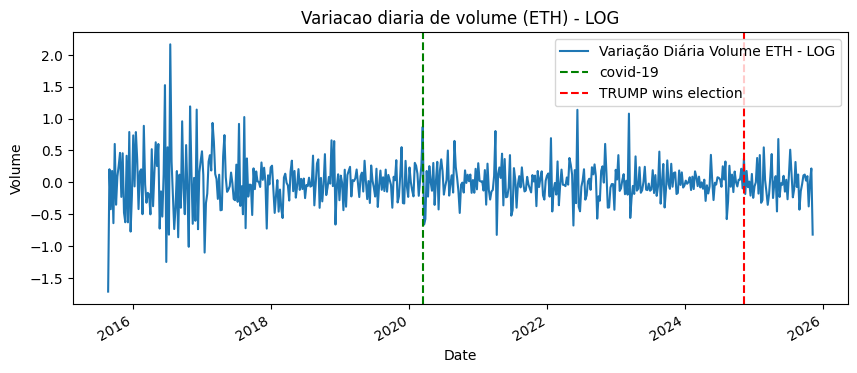

In [7]:
plt.figure(figsize=(10,4))
plt.plot(df_eth_processed['Data_UTC'], df_eth_processed['ETH_Activity_Diff'], label='Variação Diária Volume ETH - LOG')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('Variacao diaria de volume (ETH) - LOG')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()

## Exchange Inflow/Outflow
Definition
There are three separate metrics regarding exchange funds flow:

- exchange_inflow - How many coins/tokens are moved from non-exchange to exchange wallets.
- exchange_outflow - How many coins/tokens are moved from exchange to non-exchange wallets.
- exchange_balance - The difference inflow-outflow (inflow minus outflow). The usefulness of this metric comes from the fact that
- transactions from missing/unknown exchange wallets to missing/unknown exchange wallets cancel each other.
Some of the metrics have a USD equivalent - the raw value is multiplied by the price of the coin/token at the given date. The available USD metrics are exchange_inflow_usd and exchange_outflow_usd

In [8]:
df_social_volume = pd.read_csv(rf"raw/2015_inflow_outflow_supplyRatio_cexs.csv")
df_social_volume['Data_UTC'] = pd.to_datetime(df_social_volume['Date'], utc=True,).dt.strftime("%Y-%m-%d")
df_social_volume = df_social_volume.query("Data_UTC > '2015-08-06'")


df_in_out_flow = df_social_volume.copy()
df_in_out_flow = df_in_out_flow.rename(columns={f'Supply on Exchanges (as % of total supply) (ETH)':'ETH_Supply_Pct_Raw'})

df_in_out_flow[['Data_UTC','ETH_Supply_Pct_Raw']]

,Data_UTC,ETH_Supply_Pct_Raw
6,2015-08-13,8.622603
7,2015-08-20,8.490808
8,2015-08-27,8.763742
9,2015-09-03,10.343385
10,2015-09-10,10.274647
...,...,...
536,2025-10-09,1.969400
537,2025-10-16,1.993599
538,2025-10-23,1.752722
539,2025-10-30,1.680963


In [9]:
# Supondo que seu dataframe inicial seja df_in_out_flow
# e as colunas sejam ['Data_UTC', 'ETH_Exchange_Supply_Porcentage']

df_eth_features = (
    df_in_out_flow
    .copy() # Boa prática para não alterar o original
    
    # 1. Padronização de Data e Ordenação
    .assign(Data_UTC = lambda df: pd.to_datetime(df['Data_UTC']))
    .sort_values('Data_UTC')
    
    # --- TRANSFORMAÇÃO 1: Variação Diária (O Fluxo Líquido) ---
    # Transforma o "Estoque" (Nível) em "Fluxo" (Movimento).
    # Esta série se torna Estacionária (ideal para Machine Learning).
    # Valor Positivo (+): Inflow (Entrada na Exchange)
    # Valor Negativo (-): Outflow (Saída para DeFi/Cold Wallet)
    .assign(ETH_Supply_Diff = lambda df: df['ETH_Supply_Pct_Raw'].diff())
    
    # --- TRANSFORMAÇÃO 2: Z-Score Móvel (Detector de Anomalia) ---
    # Calcula quão "anormal" foi o movimento de hoje em comparação aos últimos 30 dias.
    # Isso permite comparar a Era Varejo (alta volatilidade) com a Era Institucional (menor volatilidade)
    # na mesma escala.
    .assign(ETH_Supply_Z_Score = lambda df: 
            (df['ETH_Supply_Diff'] - df['ETH_Supply_Diff'].rolling(window=30).mean()) / 
            df['ETH_Supply_Diff'].rolling(window=30).std()
    )
    
    # 3. Limpeza de Nulos (Gerados pelo diff e rolling)
    # Preenchemos com 0 assumindo "neutralidade" nos primeiros dias, ou bfill.
    .fillna(0)
    
    # 4. Seleção Final das Features para o Modelo
    # Removemos a coluna 'Raw' pois ela não é estacionária e confunde o modelo.
    [['Data_UTC', 'ETH_Supply_Diff', 'ETH_Supply_Z_Score','ETH_Supply_Pct_Raw']]
)

# Visualização das primeiras linhas
df_eth_features.tail()

,Data_UTC,ETH_Supply_Diff,ETH_Supply_Z_Score,ETH_Supply_Pct_Raw
536,2025-10-09,-0.258904,-0.770270,1.969400
537,2025-10-16,0.024199,0.952453,1.993599
538,2025-10-23,-0.240876,-0.704949,1.752722
539,2025-10-30,-0.071759,0.356338,1.680963
540,2025-11-06,-0.016845,0.750049,1.664118


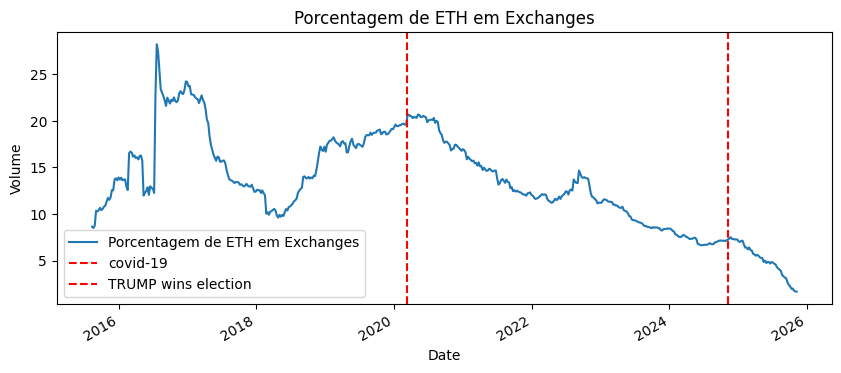

In [10]:
plt.figure(figsize=(10,4))
plt.plot(df_eth_features['Data_UTC'], df_eth_features['ETH_Supply_Pct_Raw'], label='Porcentagem de ETH em Exchanges')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.axvline(pd.to_datetime('2020-03-12'), color='red', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('Porcentagem de ETH em Exchanges')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()

### VOLUME SOCIAL DA PALAVRA "ETH" E RELACIONADOS NAS REDES SOCIAS

Social Volume is build on top of the Social Data.

- The total number of social data text documents that contain the given search term at least once. Examples of documents are telegram messages and reddit posts. If a single short telegram message includes the word crypto more than once, this message will increase the social volume of the word crypto by 1. If a long reddit post contains the word crypto 10 times, this again will increase the social volume of the word crypto by 1.

In [11]:
df_social_volume = pd.read_csv(rf"raw/2011_social_volume.csv")
df_social_volume['Data_UTC'] = pd.to_datetime(df_social_volume['Date'], utc=True,).dt.strftime("%Y-%m-%d")
df_social_volume = df_social_volume.query("Data_UTC > '2015-08-06'")


df_eth_social = df_social_volume.copy()
df_eth_social = df_eth_social.rename(columns={f'Social Volume AI (ETH)':'Social_Vol_Docs'})
df_eth_social = df_eth_social.assign(Data_UTC = lambda df: pd.to_datetime(df['Data_UTC']))
df_eth_social

,Date,Social Volume (ETH),Social_Vol_Docs,Data_UTC
299,2015-08-13T00:00:00.000Z,750.0,1072,2015-08-13
300,2015-08-20T00:00:00.000Z,379.0,465,2015-08-20
301,2015-08-27T00:00:00.000Z,356.0,466,2015-08-27
302,2015-09-03T00:00:00.000Z,347.0,494,2015-09-03
303,2015-09-10T00:00:00.000Z,362.0,467,2015-09-10
...,...,...,...,...
829,2025-10-09T00:00:00.000Z,7767.0,11610,2025-10-09
830,2025-10-16T00:00:00.000Z,7595.0,12916,2025-10-16
831,2025-10-23T00:00:00.000Z,7053.0,11383,2025-10-23
832,2025-10-30T00:00:00.000Z,9800.0,12755,2025-10-30


In [12]:
# Supondo que seu dataframe carregado seja df_social
# Colunas esperadas: ['Data_UTC', 'Social Volume']

df_social_features = (
    df_eth_social
    .copy()
    .assign(Data_UTC = lambda df: pd.to_datetime(df['Data_UTC']))
    .sort_values('Data_UTC')
    
    # 1. Transformação Logarítmica (Essencial para contagem de documentos)
    # Viralidade é exponencial. A diferença entre 1.000 e 10.000 msgs 
    # é psicologicamente igual à diferença entre 10.000 e 100.000. O Log lineariza isso.
    .assign(Social_Log = lambda df: np.log1p(df['Social_Vol_Docs']))
    
    # 2. O Pulo do Gato: De Semanal para Diário
    .set_index('Data_UTC')
    .resample('D')              # Cria as linhas vazias para os dias faltantes
    .interpolate(method='time') # Preenche suavemente entre uma semana e outra

    # 3. Z-Score (Detector de Anomalia de Hype)
    # Agora que o dado é diário (interpolado), o window=30 representa 30 DIAS.
    # Se fizéssemos isso antes do resample, window=30 seriam 30 SEMANAS.
    .assign(ETH_Social_Breadth_Z = lambda df: 
            (df['Social_Log'] - df['Social_Log'].rolling(window=30).mean()) / 
            df['Social_Log'].rolling(window=30).std()
    )
    
    # Preenchimento de nulos gerados pela janela móvel e interpolação inicial
    .fillna(method='bfill') # Preenche o início com o primeiro dado disponível
    .fillna(0)              # Segurança extra
    
    # Retorna o índice para coluna e seleciona
    .reset_index()
    [['Data_UTC', 'ETH_Social_Breadth_Z']]
)
df_social_features

/var/folders/h1/_3z4z04x4j17zlfj224w53hr0000gn/T/ipykernel_6286/2970496775.py:18: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .interpolate(method='time') # Preenche suavemente entre uma semana e outra
/var/folders/h1/_3z4z04x4j17zlfj224w53hr0000gn/T/ipykernel_6286/2970496775.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill') # Preenche o início com o primeiro dado disponível


,Data_UTC,ETH_Social_Breadth_Z
0,2015-08-13,-0.557580
1,2015-08-14,-0.557580
2,2015-08-15,-0.557580
3,2015-08-16,-0.557580
4,2015-08-17,-0.557580
...,...,...
3734,2025-11-02,-3.572753
3735,2025-11-03,-3.642930
3736,2025-11-04,-3.494852
3737,2025-11-05,-3.301893


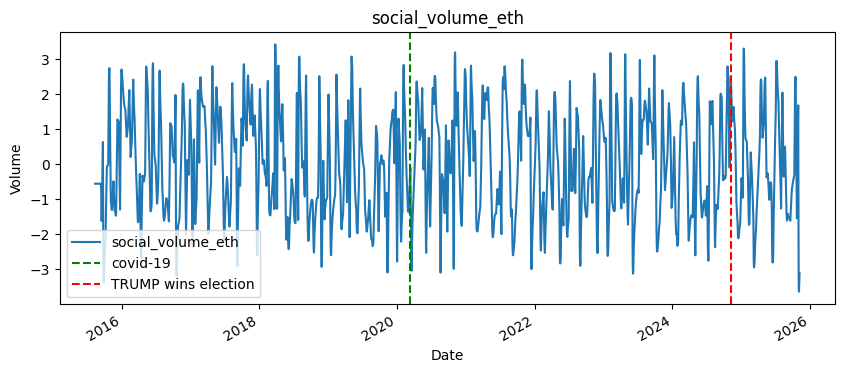

In [15]:
plt.figure(figsize=(10,4))
plt.plot(df_social_features['Data_UTC'], df_social_features['ETH_Social_Breadth_Z'], label='social_volume_eth')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('social_volume_eth')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()